In [1]:
#Dependancies
import pandas as pd
import matplotlib.pyplot as plt
from us import states
import requests
import us
from census import Census
from Config import (census_key)
import numpy as np
from scipy.stats import linregress

In [2]:
### Import CDC Data

cdc_data=pd.read_csv('flupneumo.csv',encoding='utf-8')
type(cdc_data)
cdc_data = cdc_data.loc[cdc_data['geoid'] == "State"]
cdc_data["All Deaths"] = cdc_data["All Deaths"].str.replace(",", "")
cdc_data["All Deaths"] = cdc_data["All Deaths"].astype(float)
cdc_data["Deaths from pneumonia and influenza"] = cdc_data["Deaths from pneumonia and influenza"].str.replace(",", "")
cdc_data["Deaths from pneumonia and influenza"] = cdc_data["Deaths from pneumonia and influenza"].astype(float)


cdc_data

,geoid,Region,State,age,season,MMWR Year/Week,Deaths from influenza,Deaths from pneumonia,Deaths from pneumonia and influenza,All Deaths,Pecent of deaths due to pneumonia or influenza,pecent complete
0,State,NaN,New Hampshire,All,2017-18,201805,NaN,NaN,28.0,286.0,9.790210,143.277643
1,State,NaN,New York City,All,2015-16,201629,NaN,NaN,64.0,972.0,6.584362,97.618498
2,State,NaN,Missouri,All,2009-10,201020,NaN,NaN,84.0,984.0,8.536585,93.231242
4,State,NaN,Kansas,All,2017-18,201820,NaN,NaN,19.0,496.0,3.830645,105.194581
5,State,NaN,Georgia,All,2009-10,201032,NaN,NaN,89.0,1283.0,6.936867,94.671638
...,...,...,...,...,...,...,...,...,...,...,...,...
32600,State,NaN,Michigan,All,2017-18,201825,NaN,NaN,91.0,1825.0,4.986301,108.089765
32601,State,NaN,Vermont,All,2018-19,201909,NaN,NaN,10.0,115.0,8.695652,114.621584
32602,State,NaN,Pennsylvania,All,2017-18,201806,NaN,NaN,232.0,2896.0,8.011050,120.198668
32604,State,NaN,Georgia,All,2017-18,201814,NaN,NaN,94.0,1640.0,5.731707,121.014408


In [3]:
state_list = cdc_data.loc[cdc_data["State"]=="Florida"]
#state_list = cdc_data.groupby("State").count()
state_list

,geoid,Region,State,age,season,MMWR Year/Week,Deaths from influenza,Deaths from pneumonia,Deaths from pneumonia and influenza,All Deaths,Pecent of deaths due to pneumonia or influenza,pecent complete
283,State,NaN,Florida,All,2014-15,201533,NaN,NaN,190.0,3535.0,5.374823,106.531174
381,State,NaN,Florida,All,2016-17,201648,NaN,NaN,212.0,3917.0,5.412305,118.043171
404,State,NaN,Florida,All,2011-12,201238,NaN,NaN,194.0,3340.0,5.808383,100.654631
417,State,NaN,Florida,All,2012-13,201246,NaN,NaN,181.0,3507.0,5.161106,105.687363
512,State,NaN,Florida,All,2012-13,201331,NaN,NaN,179.0,3301.0,5.422599,99.479323
...,...,...,...,...,...,...,...,...,...,...,...,...
32430,State,NaN,Florida,All,2018-19,201843,NaN,NaN,182.0,3872.0,4.700413,116.687046
32485,State,NaN,Florida,All,2017-18,201816,NaN,NaN,219.0,3925.0,5.579618,118.284260
32527,State,NaN,Florida,All,2017-18,201818,NaN,NaN,182.0,3879.0,4.691931,116.897999
32551,State,NaN,Florida,All,2017-18,201835,NaN,NaN,191.0,3702.0,5.159373,111.563906


In [4]:
### Import Census Data
c = Census(census_key, year=2017)
census_data = c.acs5.get(("B19013_001E", "B01003_001E", "B01002_001E", "B15003_002E", "B17001_002E"), {'for': 'state:*'})
census_pd = pd.DataFrame(census_data)
census_pd.dtypes

census_pd['State'] = census_pd['state'].apply(us.states.lookup)
census_pd['State'] =census_pd['State'].astype(str)
census_pd = census_pd.drop(columns="state")
census_pd = census_pd.rename(columns={"B19013_001E": "Median Household Income",
                                      "B01003_001E": "Population",
                                       "B01002_001E": "Meadian Age",
                                       "B15003_002E": ">25 with No Degree",
                                       "B17001_002E": "People in Poverty",})

census_pd

,Median Household Income,Population,Meadian Age,>25 with No Degree,People in Poverty,State
0,19775.0,3468963.0,40.1,62694.0,1543220.0,Puerto Rico
1,46472.0,4850771.0,38.7,41118.0,849699.0,Alabama
2,76114.0,738565.0,33.9,3451.0,73380.0,Alaska
3,53510.0,6809946.0,37.2,65604.0,1128046.0,Arizona
4,43813.0,2977944.0,37.9,23003.0,524211.0,Arkansas
5,67169.0,38982847.0,36.1,691906.0,5773408.0,California
6,65458.0,5436519.0,36.5,34489.0,612143.0,Colorado
7,73781.0,3594478.0,40.8,25274.0,350783.0,Connecticut
8,77649.0,672391.0,33.9,5141.0,111025.0,District of Columbia
9,63036.0,943732.0,39.8,7723.0,111304.0,Delaware


In [5]:
### Question 1 - Which states have the highest rate of death by flu and influenza
#cdc_data["All Deaths"] = cdc_data["All Deaths"].str.extract('(\d+)')
#cdc_data["All Deaths"] = pd.to_numeric(cdc_data["All Deaths"],errors='coerce')
# #cdc_data["Deaths from pneumonia and influenza"] = pd.to_numeric(cdc_data["Deaths from pneumonia and influenza"],errors='coerce')
cdc_data = cdc_data.drop(columns=["Region", "MMWR Year/Week", "Pecent of deaths due to pneumonia or influenza", "pecent complete"])
season = cdc_data.groupby("State").sum()
#season["Death Rate"] = ((season["Deaths from pneumonia and influenza"] / season["All Deaths"])*100).map("{:,.2f}%".format)
season["Death Rate"] = ((season["Deaths from pneumonia and influenza"] / season["All Deaths"])*100)
season=pd.DataFrame(season)
season=season.reset_index()
season.dtypes

State                                   object
Deaths from pneumonia and influenza    float64
All Deaths                             float64
Death Rate                             float64
dtype: object

In [6]:
### Question 2 - Which flu season had the most deaths
clean_data = cdc_data.groupby("season").sum()
clean_data["Death Rate"] = ((clean_data["Deaths from pneumonia and influenza"] / clean_data["All Deaths"])*100)
#clean_data["Death Rate"] = ((clean_data["Deaths from pneumonia and influenza"] / clean_data["All Deaths"])*100).map("{:,.2f}%".format)
clean_data=clean_data.reset_index()
clean_data

,season,Deaths from pneumonia and influenza,All Deaths,Death Rate
0,2009-10,192152.0,2444559.0,7.860395
1,2010-11,198253.0,2508625.0,7.902855
2,2011-12,185225.0,2494437.0,7.425523
3,2012-13,200208.0,2595903.0,7.712461
4,2013-14,187417.0,2584499.0,7.251580
5,2014-15,201857.0,2757092.0,7.321373
6,2015-16,181825.0,2701816.0,6.729733
7,2016-17,186575.0,2790566.0,6.685920
8,2017-18,195386.0,2833062.0,6.896637
9,2018-19,86986.0,1329238.0,6.544050


In [7]:
clean_data=clean_data.sort_values(by='season', ascending=True)
#clean_data=clean_data.sort_values(by='Death Rate', ascending=True)
clean_data.dtypes

season                                  object
Deaths from pneumonia and influenza    float64
All Deaths                             float64
Death Rate                             float64
dtype: object

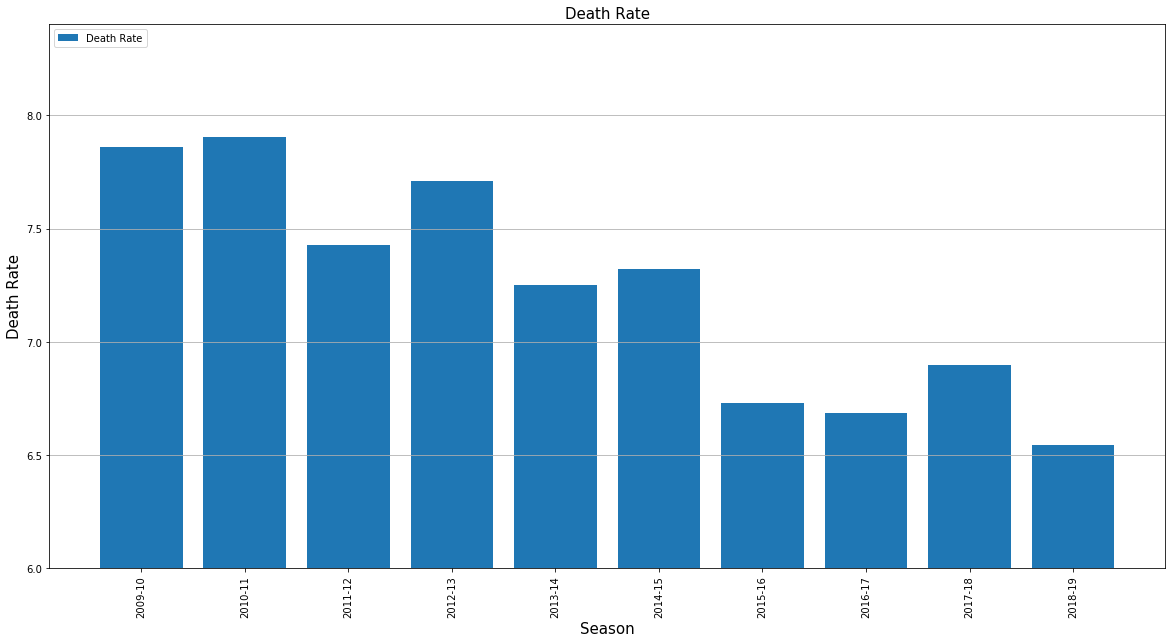

In [8]:
# Question 1 - Which flu season had the most deaths
x_axis = np.arange(len(clean_data))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(clean_data["season"], clean_data["Death Rate"], label="Death Rate")
#plt.bar(clean_data["Death Rate"], clean_data["season"], label="Death Rate")
plt.title("Death Rate", fontsize=15)
plt.ylabel("Death Rate", fontsize=15)
plt.xlabel("Season", fontsize=15)
plt.grid(axis="y")
plt.legend(loc="upper left")
plt.xticks(tick_locations, clean_data["season"], rotation="vertical")
#legend(loc="best", fontsize="small", fancybox=True)
# Show the Figure
#plt.xlim(-0.75, len(x_axis))
plt.ylim(6, max(clean_data["Death Rate"]+0.5))
#plt.ylim(5, 8)
#plt.ylim(5, max(season["All Deaths"])+5)
plt.show()

In [9]:
### Question 3 - Compare death rate to population by state
#merged = season.merge(census_pd,how="right", on="State")
#season = season.reset_index()
merged = pd.merge(census_pd, season ,on ="State", how="left")
#merged = merged.("State").sum()
merged["Death Rate"] = ((merged["Deaths from pneumonia and influenza"] / merged["Population"])*100)
merged

#season.dtypes

,Median Household Income,Population,Meadian Age,>25 with No Degree,People in Poverty,State,Deaths from pneumonia and influenza,All Deaths,Death Rate
0,19775.0,3468963.0,40.1,62694.0,1543220.0,Puerto Rico,NaN,NaN,NaN
1,46472.0,4850771.0,38.7,41118.0,849699.0,Alabama,30967.0,481905.0,0.638393
2,76114.0,738565.0,33.9,3451.0,73380.0,Alaska,2316.0,39055.0,0.313581
3,53510.0,6809946.0,37.2,65604.0,1128046.0,Arizona,31726.0,498929.0,0.465877
4,43813.0,2977944.0,37.9,23003.0,524211.0,Arkansas,23007.0,292166.0,0.772580
5,67169.0,38982847.0,36.1,691906.0,5773408.0,California,205529.0,2391194.0,0.527229
6,65458.0,5436519.0,36.5,34489.0,612143.0,Colorado,21154.0,333505.0,0.389109
7,73781.0,3594478.0,40.8,25274.0,350783.0,Connecticut,21009.0,276938.0,0.584480
8,77649.0,672391.0,33.9,5141.0,111025.0,District of Columbia,2855.0,45448.0,0.424604
9,63036.0,943732.0,39.8,7723.0,111304.0,Delaware,5215.0,79546.0,0.552593


In [10]:
### Question 4 - Compare death rate to average household income by state


In [11]:
#census_pd.to_csv('census_pd.csv', index=False)
# season.to_csv('season.csv', index=False)
# census_pdcsv=pd.read_csv('census_pd.csv',encoding='utf-8')
# seasoncsv=pd.read_csv('season.csv',encoding='utf-8')


In [12]:
# census_pd.to_csv('census_pd.csv', index=False)
# season.to_csv('season.csv', index=False)
# census_pdcsv=pd.read_csv('census_pd.csv',encoding='utf-8')
# seasoncsv=pd.read_csv('season.csv',encoding='utf-8')
# mergedcsv = census_pdcsv.merge(seasoncsv, on='State', how="left")
# mergedcsv=mergedcsv.dropna()
# mergedcsv

In [13]:
season_sorted=season.sort_values(by='Death Rate', ascending=True)
season_sorted

,State,Deaths from pneumonia and influenza,All Deaths,Death Rate
18,Louisiana,22593.0,409136.0,5.522125
9,Florida,101007.0,1776191.0,5.686720
38,Oregon,18968.0,325453.0,5.828184
1,Alaska,2316.0,39055.0,5.930099
10,Georgia,43847.0,730896.0,5.999075
30,New Jersey,42558.0,683349.0,6.227857
8,District of Columbia,2855.0,45448.0,6.281905
12,Idaho,7661.0,121299.0,6.315798
5,Colorado,21154.0,333505.0,6.342933
2,Arizona,31726.0,498929.0,6.358821


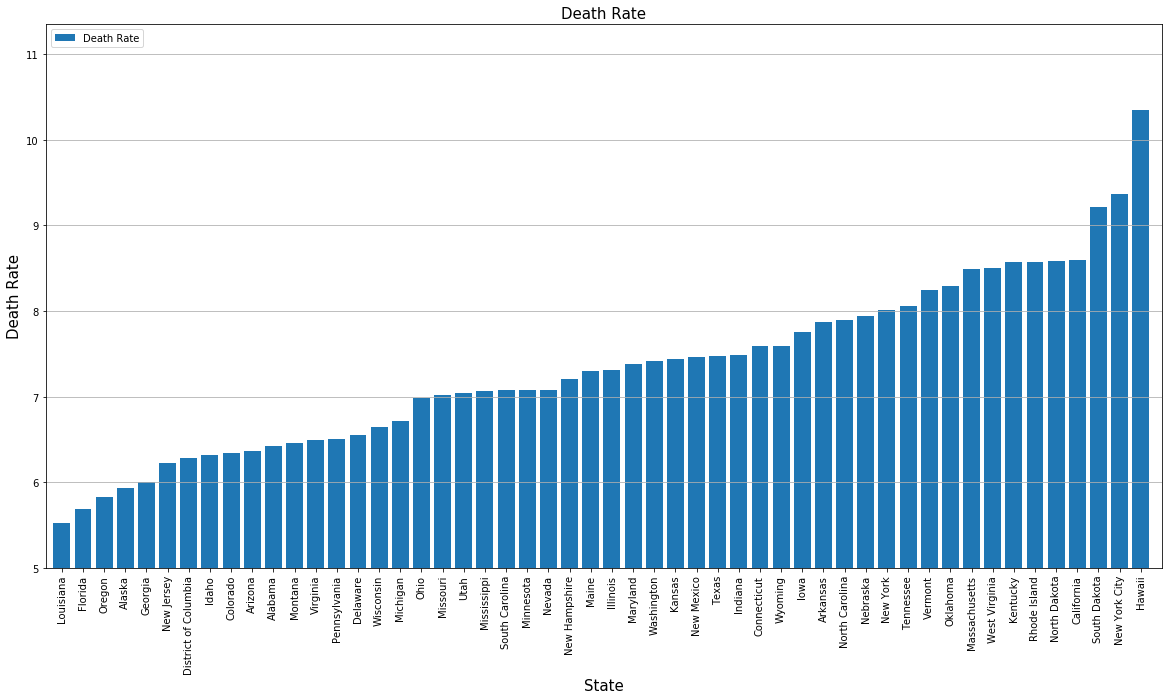

In [14]:
# Generate the Plot Death Rate vs States

x_axis = np.arange(len(season_sorted))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(season_sorted["State"], season_sorted["Death Rate"], label="Death Rate")
plt.title("Death Rate", fontsize=15)
plt.ylabel("Death Rate", fontsize=15)
plt.xlabel("State", fontsize=15)
plt.grid(axis="y")
plt.legend(loc="upper left")
plt.xticks(tick_locations, season_sorted["State"], rotation="vertical")
#legend(loc="best", fontsize="small", fancybox=True)
# Show the Figure
plt.xlim(-0.75, len(x_axis))
plt.ylim(5, max(season_sorted["Death Rate"])+1)
#plt.ylim(5, max(season["All Deaths"])+5)
plt.show()

In [28]:
merged = census_pd.merge(season, on='State', how="left")
merged=merged.dropna()
merged.head(1)
#merged.dtypes
merged["% People in Poverty"] = 100*merged["People in Poverty"]/merged["Population"]
merged["% People with no Degree"] = 100*merged[">25 with No Degree"]/merged["Population"]
merged["Death Rate"] = ((merged["Deaths from pneumonia and influenza"] / merged["Population"])*100)
merged

,Median Household Income,Population,Meadian Age,>25 with No Degree,People in Poverty,State,Deaths from pneumonia and influenza,All Deaths,Death Rate,% People in Poverty,% People with no Degree
1,46472.0,4850771.0,38.7,41118.0,849699.0,Alabama,30967.0,481905.0,0.638393,17.516782,0.847659
2,76114.0,738565.0,33.9,3451.0,73380.0,Alaska,2316.0,39055.0,0.313581,9.935483,0.467257
3,53510.0,6809946.0,37.2,65604.0,1128046.0,Arizona,31726.0,498929.0,0.465877,16.564683,0.963356
4,43813.0,2977944.0,37.9,23003.0,524211.0,Arkansas,23007.0,292166.0,0.772580,17.603118,0.772446
5,67169.0,38982847.0,36.1,691906.0,5773408.0,California,205529.0,2391194.0,0.527229,14.810124,1.774899
6,65458.0,5436519.0,36.5,34489.0,612143.0,Colorado,21154.0,333505.0,0.389109,11.259834,0.634395
7,73781.0,3594478.0,40.8,25274.0,350783.0,Connecticut,21009.0,276938.0,0.584480,9.758941,0.703134
8,77649.0,672391.0,33.9,5141.0,111025.0,District of Columbia,2855.0,45448.0,0.424604,16.511970,0.764585
9,63036.0,943732.0,39.8,7723.0,111304.0,Delaware,5215.0,79546.0,0.552593,11.794026,0.818347
10,50883.0,20278447.0,41.8,213582.0,3070972.0,Florida,101007.0,1776191.0,0.498100,15.144020,1.053246


The rsquared =-0.2685214637431778


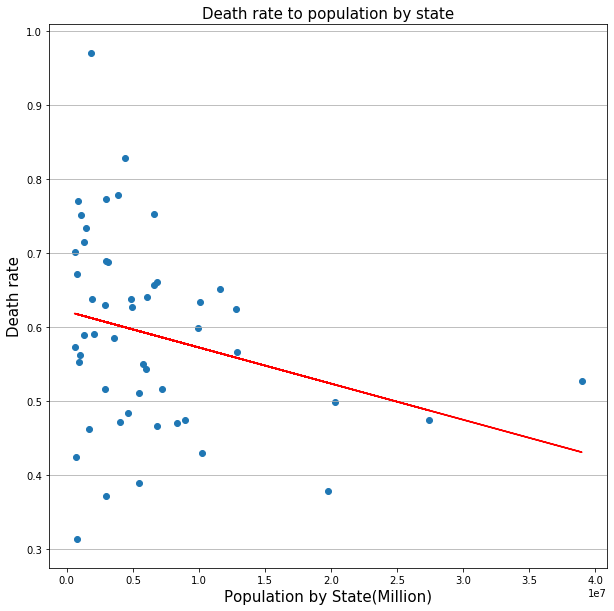

In [30]:
### Question 3 - Compare death rate to population by state
#merged.plot.scatter(merged["Population"],merged["Death Rate"] )
x_values=merged["Population"]
y_values=merged["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plt.legend(loc="upper left")
#plt.xticks(tick_locations, merged["Population by State"], rotation="vertical")
#legend(loc="best", fontsize="small", fancybox=True)
# Show the Figure
#plt.xlim(-0.75, len(x_axis))
#plt.ylim(5, max(season_sorted["Death Rate"])+1)
#plt.scatter(merged["Population"], merged["Death Rate"], label="Death Rate")
plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Death rate to population by state", fontsize=15)
plt.ylabel("Death rate", fontsize=15)
plt.xlabel("Population by State(Million)", fontsize=15)
plt.grid(axis="y")
print(f"The rsquared ={rvalue}")
plt.show()

In [17]:
### Question 4 - Compare death rate to average household income by state

The rsquared =-0.4516697371501291


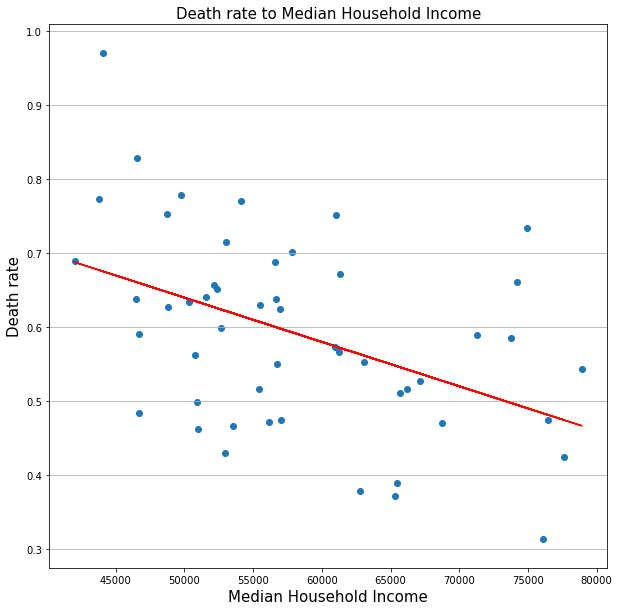

In [32]:
x_values=merged["Median Household Income"]
y_values=merged["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plt.legend(loc="upper left")
#plt.xticks(tick_locations, merged["Population by State"], rotation="vertical")
#legend(loc="best", fontsize="small", fancybox=True)
# Show the Figure
#plt.xlim(-0.75, len(x_axis))
#plt.ylim(5, max(season_sorted["Death Rate"])+1)
#plt.scatter(merged["Population"], merged["Death Rate"], label="Death Rate")
plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(55000,10),fontsize=15,color="red")
plt.title("Death rate to Median Household Income", fontsize=15)
plt.ylabel("Death rate", fontsize=15)
plt.xlabel("Median Household Income", fontsize=15)
plt.grid(axis="y")
print(f"The rsquared ={rvalue}")
plt.show()

The rsquared =0.44554512721202155


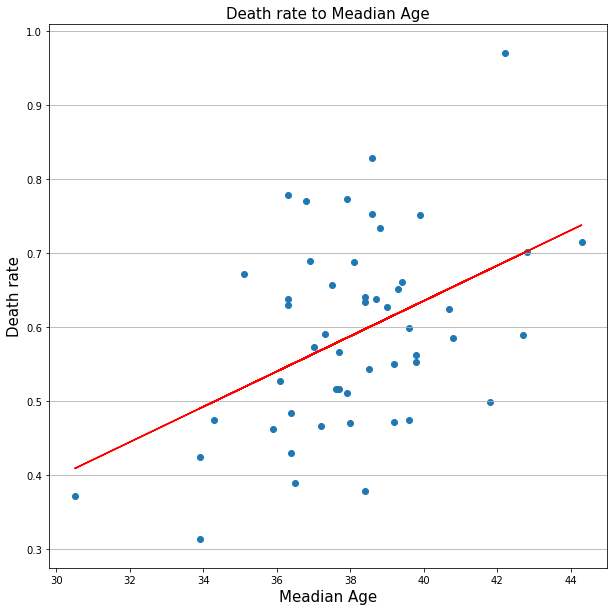

In [33]:
x_values=merged["Meadian Age"]
y_values=merged["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.title("Death rate to Meadian Age", fontsize=15)
plt.ylabel("Death rate", fontsize=15)
plt.xlabel("Meadian Age", fontsize=15)
plt.grid(axis="y")
print(f"The rsquared ={rvalue}")
plt.show()

The rsquared =-0.2529819446618038


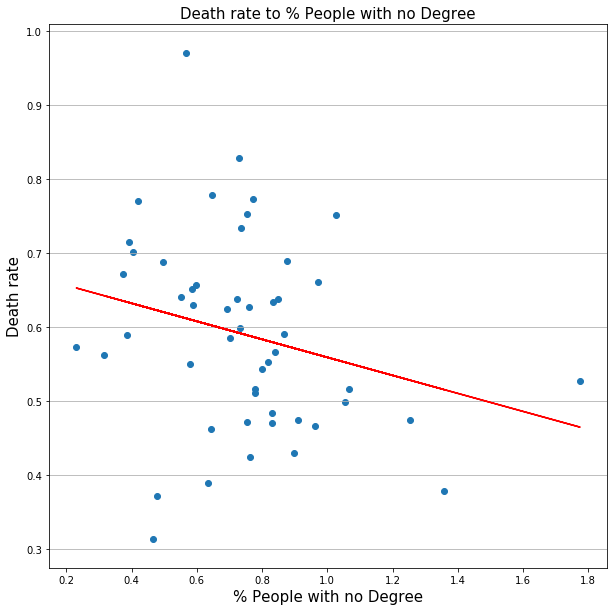

In [34]:
x_values=merged["% People with no Degree"]
y_values=merged["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.title("Death rate to % People with no Degree", fontsize=15)
plt.ylabel("Death rate", fontsize=15)
plt.xlabel("% People with no Degree", fontsize=15)
plt.grid(axis="y")
print(f"The rsquared ={rvalue}")
plt.show()

The rsquared =0.20918498571944194


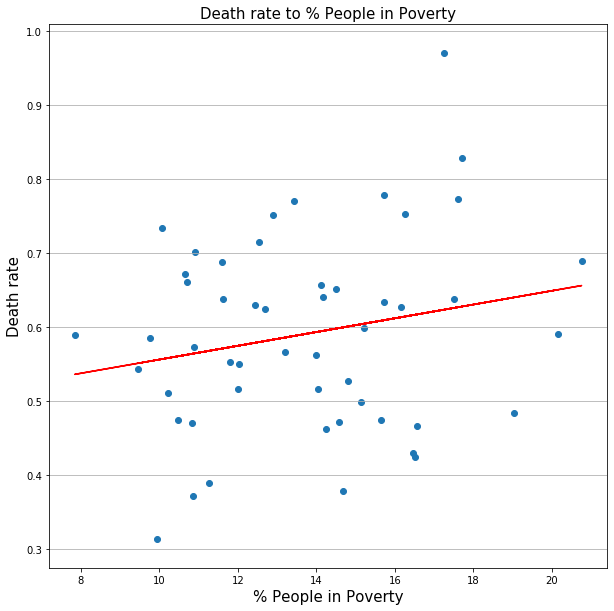

In [35]:
x_values=merged["% People in Poverty"]
y_values=merged["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.title("Death rate to % People in Poverty", fontsize=15)
plt.ylabel("Death rate", fontsize=15)
plt.xlabel("% People in Poverty", fontsize=15)
plt.grid(axis="y")
print(f"The rsquared ={rvalue}")
plt.show()

In [36]:
avgtemps = pd.read_csv('avgtemps.csv')
avgtemps = avgtemps.loc[avgtemps['Date'] > 200909]
avgtemps = avgtemps.drop(columns=(['Location ID', 'Rank', '1901-2000 Mean', 'Anomaly (1901-2000 base period)']))
avgtempsgrp = avgtemps.groupby('Location').mean()
avgtempsgrp
avgtemps = pd.DataFrame(avgtempsgrp)
avgtemps = avgtemps.reset_index()
avgtemps = avgtemps.rename(columns={'Location': 'State', 'Value': 'Average Temperature'})
alldata = pd.merge(merged, avgtemps, on='State')
alldata

,Median Household Income,Population,Meadian Age,>25 with No Degree,People in Poverty,State,Deaths from pneumonia and influenza,All Deaths,Death Rate,% People in Poverty,% People with no Degree,Date,Average Temperature
0,46472.0,4850771.0,38.7,41118.0,849699.0,Alabama,30967.0,481905.0,0.638393,17.516782,0.847659,201443.195122,63.836585
1,53510.0,6809946.0,37.2,65604.0,1128046.0,Arizona,31726.0,498929.0,0.465877,16.564683,0.963356,201443.195122,61.234146
2,43813.0,2977944.0,37.9,23003.0,524211.0,Arkansas,23007.0,292166.0,0.772580,17.603118,0.772446,201443.195122,61.117886
3,67169.0,38982847.0,36.1,691906.0,5773408.0,California,205529.0,2391194.0,0.527229,14.810124,1.774899,201443.195122,59.291057
4,65458.0,5436519.0,36.5,34489.0,612143.0,Colorado,21154.0,333505.0,0.389109,11.259834,0.634395,201443.195122,46.280488
5,73781.0,3594478.0,40.8,25274.0,350783.0,Connecticut,21009.0,276938.0,0.584480,9.758941,0.703134,201443.195122,50.412195
6,63036.0,943732.0,39.8,7723.0,111304.0,Delaware,5215.0,79546.0,0.552593,11.794026,0.818347,201443.195122,56.703252
7,50883.0,20278447.0,41.8,213582.0,3070972.0,Florida,101007.0,1776191.0,0.498100,15.144020,1.053246,201443.195122,71.807317
8,52977.0,10201635.0,36.4,91517.0,1679030.0,Georgia,43847.0,730896.0,0.429804,16.458440,0.897082,201443.195122,64.538211
9,50985.0,1657375.0,35.9,10678.0,236000.0,Idaho,7661.0,121299.0,0.462237,14.239385,0.644272,201443.195122,43.953659


The rsquared =-0.004086606877742983


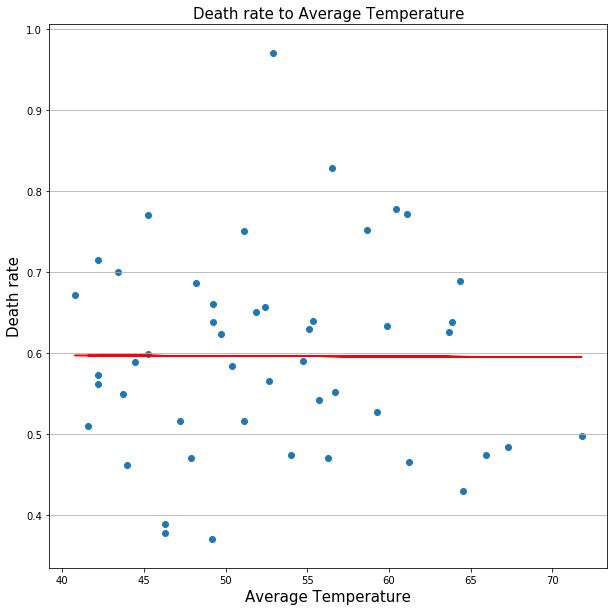

In [37]:
x_values=alldata["Average Temperature"]
y_values=alldata["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(55,9),fontsize=15,color="red")
plt.title("Death rate to Average Temperature", fontsize=15)
plt.ylabel("Death rate", fontsize=15)
plt.xlabel("Average Temperature", fontsize=15)
plt.grid(axis="y")
print(f"The rsquared ={rvalue}")
plt.show()

In [38]:
vaxrate = pd.read_csv('fluvacc.csv', encoding='latin1')
vaxrate = vaxrate.loc[:,["Names","2010-11","2011-12","2012-13","2013-14","2014-15","2015-16","2016-17","2017-18","2018-19"]]
vaxrate = vaxrate.rename(columns ={"Names" : "State"})
vaxrate["AvgVaxRate"] = vaxrate.mean(axis=1)
vaxrate.head()

,State,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,AvgVaxRate
0,Alabama,42.4,41.6,45.7,48.3,45.8,43.9,43.9,42.4,48.3,43.883333
1,Alaska,37.0,34.7,39.7,41.7,44.0,37.9,39.1,40.2,44.1,38.733333
2,Arizona,41.9,38.2,38.3,38.5,41.6,41.5,41.8,38.9,45.6,40.550000
3,Arkansas,44.2,46.6,47.0,49.7,50.5,45.4,46.2,41.7,48.8,46.650000
4,California,38.9,40.5,44.2,NR,44.2,43.7,48.0,40,47.4,43.250000


In [39]:
vaxrate = vaxrate.loc[:,["State","AvgVaxRate"]]
vaxrate.head()

,State,AvgVaxRate
0,Alabama,43.883333
1,Alaska,38.733333
2,Arizona,40.550000
3,Arkansas,46.650000
4,California,43.250000


In [40]:
alldata = alldata.merge(vaxrate, on='State', how="left")
alldata=alldata.dropna()
alldata.head()

,Median Household Income,Population,Meadian Age,>25 with No Degree,People in Poverty,State,Deaths from pneumonia and influenza,All Deaths,Death Rate,% People in Poverty,% People with no Degree,Date,Average Temperature,AvgVaxRate
0,46472.0,4850771.0,38.7,41118.0,849699.0,Alabama,30967.0,481905.0,0.638393,17.516782,0.847659,201443.195122,63.836585,43.883333
1,53510.0,6809946.0,37.2,65604.0,1128046.0,Arizona,31726.0,498929.0,0.465877,16.564683,0.963356,201443.195122,61.234146,40.550000
2,43813.0,2977944.0,37.9,23003.0,524211.0,Arkansas,23007.0,292166.0,0.772580,17.603118,0.772446,201443.195122,61.117886,46.650000
3,67169.0,38982847.0,36.1,691906.0,5773408.0,California,205529.0,2391194.0,0.527229,14.810124,1.774899,201443.195122,59.291057,43.250000
4,65458.0,5436519.0,36.5,34489.0,612143.0,Colorado,21154.0,333505.0,0.389109,11.259834,0.634395,201443.195122,46.280488,47.633333


The rsquared =0.3987909605189852


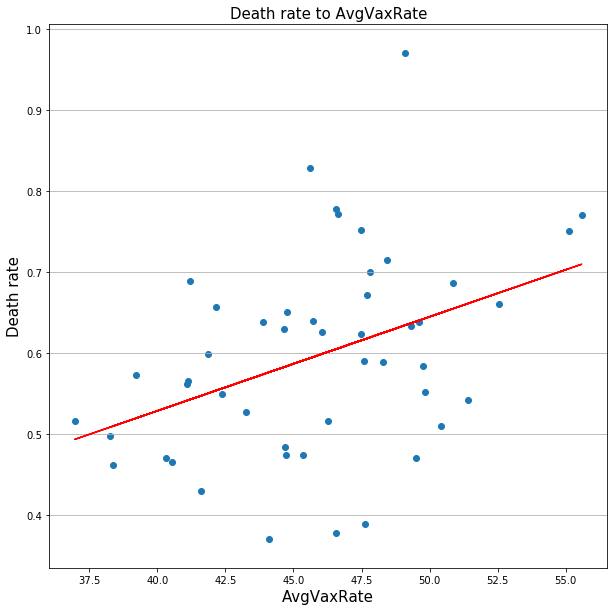

In [42]:
x_values=alldata["AvgVaxRate"]
y_values=alldata["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(40,9),fontsize=15,color="red")
plt.title("Death rate to AvgVaxRate", fontsize=15)
plt.ylabel("Death rate", fontsize=15)
plt.xlabel("AvgVaxRate", fontsize=15)
plt.grid(axis="y")
print(f"The rsquared ={rvalue}")
plt.show()